In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cars = pd.read_csv('Cars.csv')

In [7]:
cars.shape

(398, 9)

In [9]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [11]:
cars.set_index('name', inplace=True)

In [13]:
cars['mpg'].unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [15]:
cars['hp_per_weight'] = cars['horsepower'] / cars['weight']
cars.set_index('hp_per_weight', inplace=True)
print(cars)

                mpg  cylinders  displacement  horsepower  weight  \
hp_per_weight                                                      
0.037100       18.0          8         307.0       130.0    3504   
0.044679       15.0          8         350.0       165.0    3693   
0.043655       18.0          8         318.0       150.0    3436   
0.043694       16.0          8         304.0       150.0    3433   
0.040591       17.0          8         302.0       140.0    3449   
...             ...        ...           ...         ...     ...   
0.030824       27.0          4         140.0        86.0    2790   
0.024413       44.0          4          97.0        52.0    2130   
0.036601       32.0          4         135.0        84.0    2295   
0.030095       28.0          4         120.0        79.0    2625   
0.030147       31.0          4         119.0        82.0    2720   

               acceleration  model_year  origin  
hp_per_weight                                    
0.037100       

In [21]:
car = cars.loc[cars['horsepower'].idxmax()]
print(car)

mpg              16.0
cylinders           8
displacement    400.0
horsepower      230.0
weight           4278
acceleration      9.5
model_year         73
origin            usa
Name: 0.053763440860215055, dtype: object


In [23]:
high_mpg = (cars['mpg'] >= 35).sum()
print(high_mpg)

36


In [25]:
filtered_cars = cars[(cars['horsepower'] > 100) & (cars['weight'] < 3000)]
common_origin = filtered_cars['origin'].mode()[0]
print(common_origin)

usa


In [29]:
japanese_cars = cars[cars['origin'] == 'Japan']
acceleration = round(japanese_cars['acceleration'].mean(), 2)
print(acceleration)

nan


In [33]:
avg_mpg_year = cars.groupby('model_year')['mpg'].mean()
best_year = avg_mpg_year.idxmax()
print(best_year)

80


In [37]:
median_mpg = cars['mpg'].median()

In [39]:
filtered_cars = cars[cars['mpg'] > median_mpg]

In [43]:
filtered_cars.loc[:, 'hp_per_weight'] = filtered_cars['horsepower'] / filtered_cars['weight']

In [47]:
best_cars = filtered_cars.loc[filtered_cars['hp_per_weight'].idxmax(), ['hp_per_weight']]

In [49]:
print(best_cars)

hp_per_weight    0.050582
Name: 0.050581915846016116, dtype: object


In [51]:
avg_mpgr_origin = cars.groupby(['model_year', 'origin'])['mpg'].mean().reset_index()

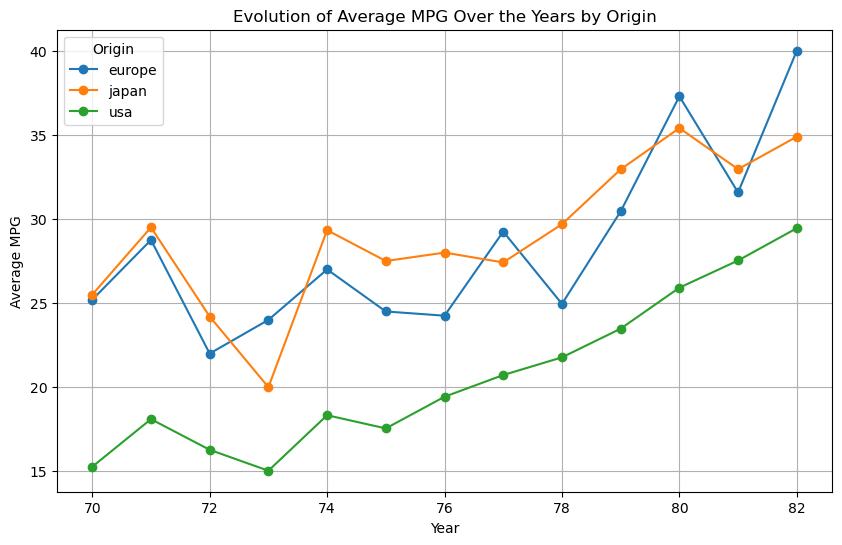

In [54]:
plt.figure(figsize=(10, 6))
for origin in avg_mpgr_origin['origin'].unique():
    subset = avg_mpgr_origin[avg_mpgr_origin['origin'] == origin]
    plt.plot(subset['model_year'], subset['mpg'], marker='o', label=origin)
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.title('Evolution of Average MPG Over the Years by Origin')
plt.legend(title="Origin")
plt.grid(True)
plt.show()

In [59]:
print(cars.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [63]:
cars = cars.dropna()

<Axes: xlabel='horsepower', ylabel='weight'>

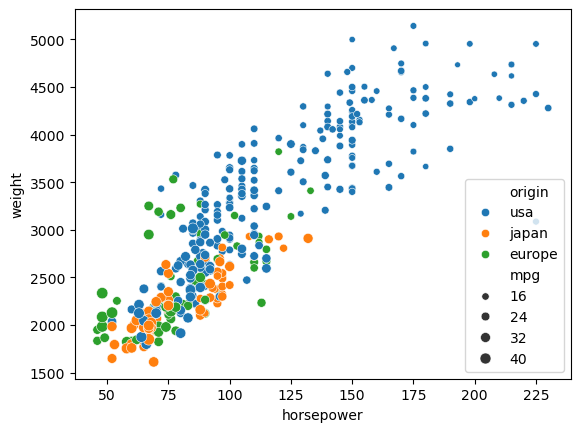

In [65]:
sns.scatterplot(data=cars.dropna(), x='horsepower', y='weight', hue='origin', size='mpg')